# Kmeans Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/Kmeans.ipynb)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
# Load the dataset
file_path = '/content/gdrive/MyDrive/DataMining/Mall_Customers.csv'
data = pd.read_csv(file_path)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


* CustomerID: A unique identifier for each customer.
* Gender: The gender of the customer (Male/Female).
* Age: The age of the customer.
* Annual Income (k$): The annual income of the customer in thousand dollars.
* Spending Score (1-100): A score assigned by the mall based on customer behavior and spending nature, ranging from 1 to 100.

In [7]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The dataset has no missing values, which is great as it simplifies the data cleaning process.

In [9]:
# Summary statistics of the dataset
summary_statistics = data.describe()
summary_statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


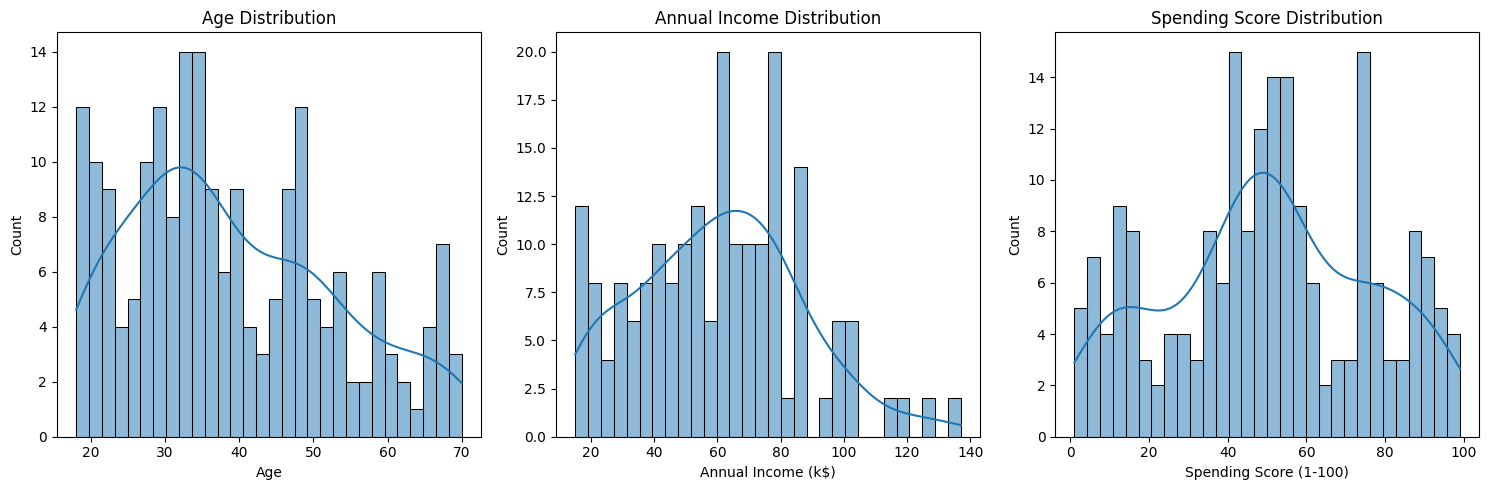

In [10]:
# Data visualization: Age, Annual Income, and Spending Score distributions
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.subplot(1, 3, 2)
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.subplot(1, 3, 3)
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()

A brief summary of the findings:

* Age: The distribution of age appears to be fairly widespread, with a slight concentration of younger customers.
* Annual Income (k$): The distribution of annual income is roughly uniform, with a slight increase in frequency at higher income levels.
* Spending Score (1-100): The spending score distribution is quite uniform, indicating a diverse range of spending behavior among customers.

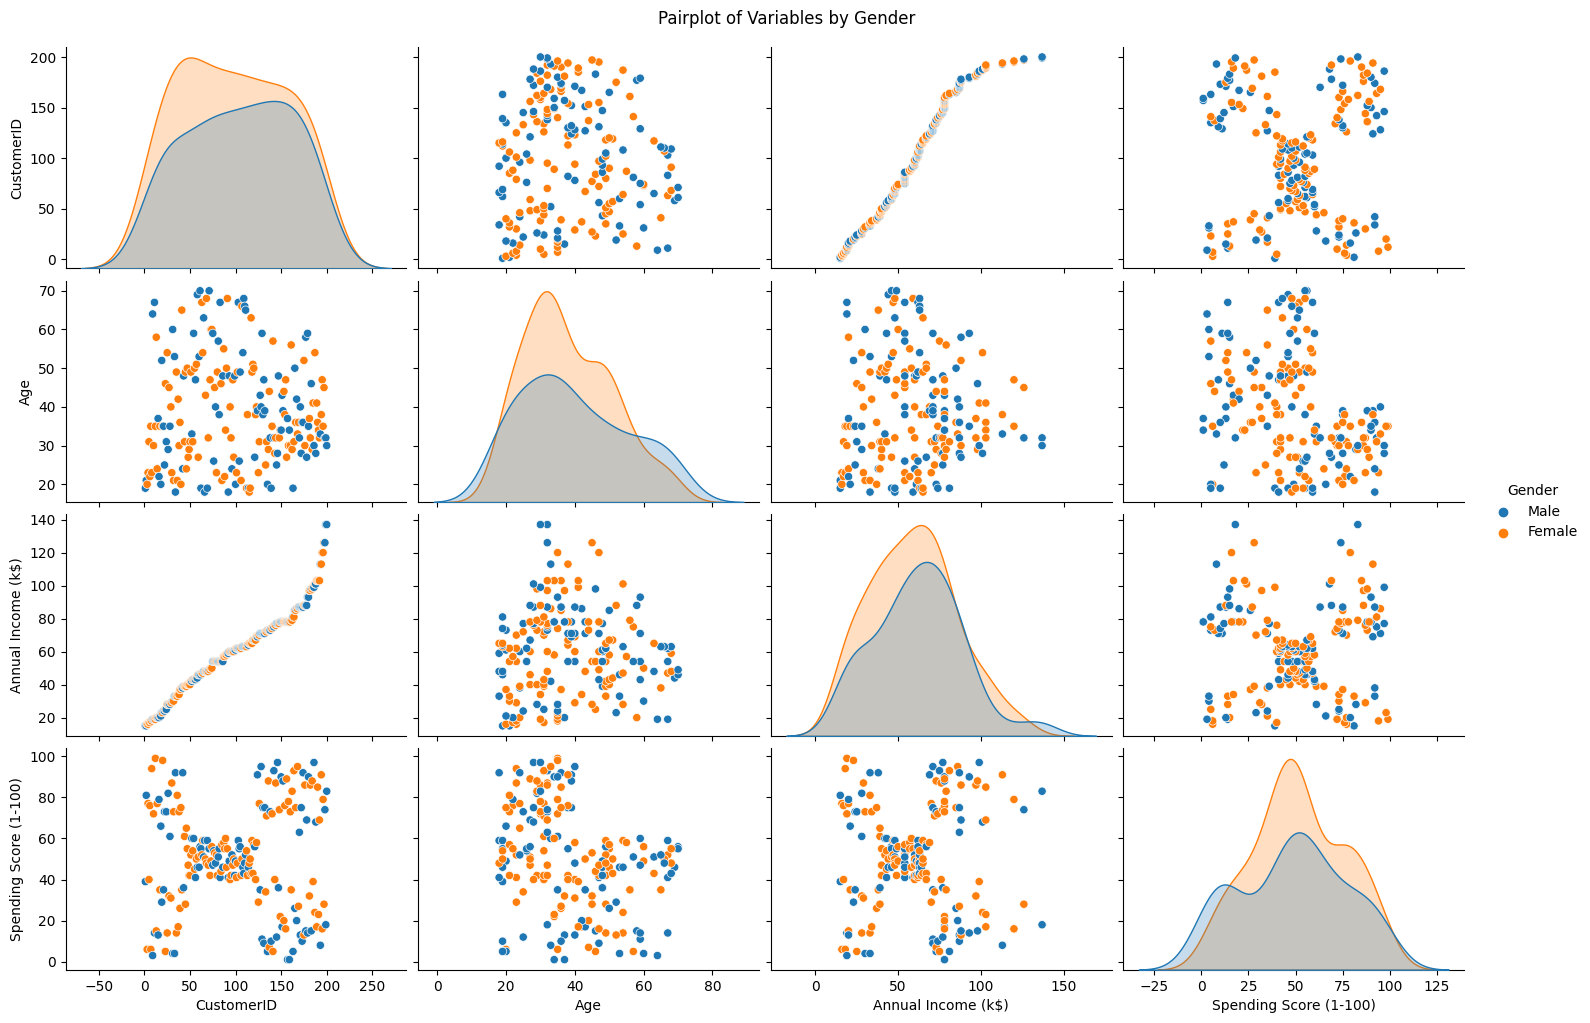

In [12]:
# Exploring relationships between variables with pairplot and some additional visualizations
# Pairplot and scatter plots
sns.pairplot(data, hue='Gender', aspect=1.5)
plt.suptitle("Pairplot of Variables by Gender", y=1.02)
plt.show()

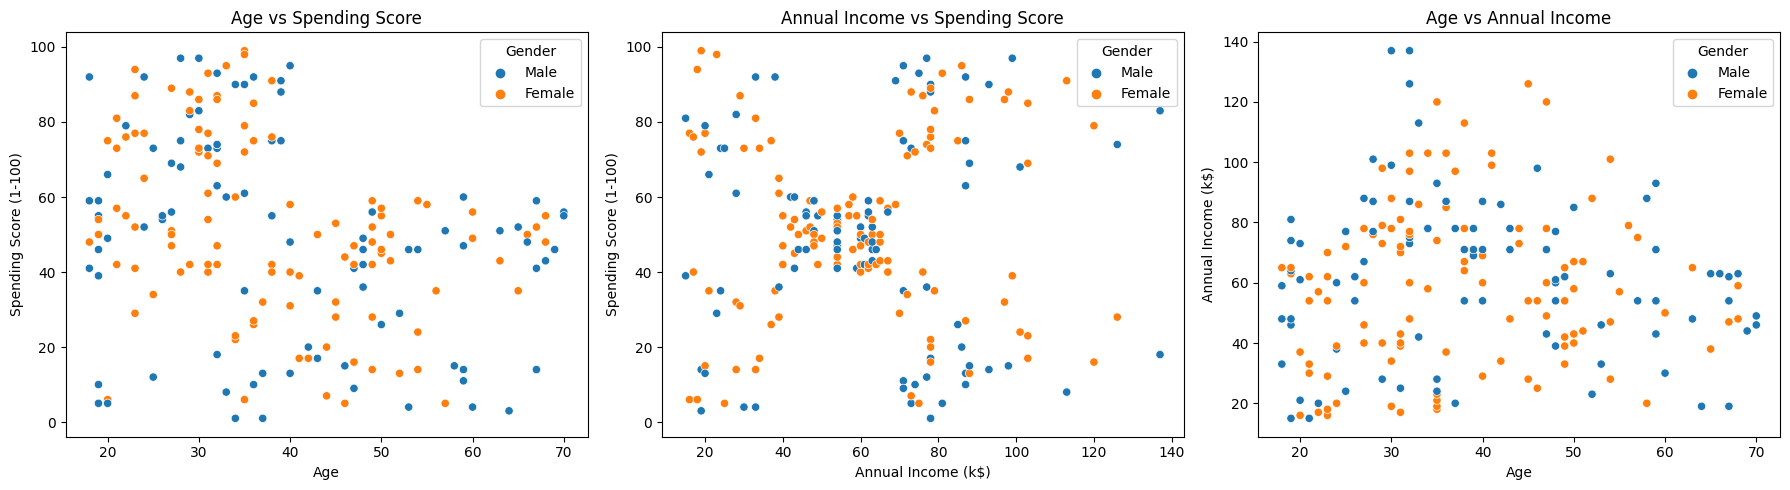

In [13]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Age vs Spending Score')
plt.subplot(1, 3, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs Spending Score')
plt.subplot(1, 3, 3)
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Gender', data=data)
plt.title('Age vs Annual Income')
plt.tight_layout()
plt.show()

The pairplot and scatter plots provide valuable insights into the relationships between different variables in the dataset, with distinctions made based on gender:

* Pairplot: This gives a comprehensive view of how each pair of variables interacts and their individual distributions. The hue based on gender adds an extra layer of understanding to these relationships.

* Age vs Spending Score: There doesn't seem to be a clear linear relationship between age and spending score. However, there's a noticeable concentration of younger customers with a high spending score.

* Annual Income vs Spending Score: This plot reveals some interesting patterns, possibly hinting at different customer segments based on income and spending score. There seems to be clusters forming which could be crucial for the K-Means clustering.

* Age vs Annual Income: The relationship between age and annual income doesn't show a clear pattern or trend. Income levels are fairly distributed across different ages.

In [14]:
# Feature Selection for K-Means Clustering
# Based on the analysis, 'Annual Income (k$)' and 'Spending Score (1-100)' seem like relevant features for clustering
# We will focus on these two features for clustering
selected_features = data[['Annual Income (k$)', 'Spending Score (1-100)']]
selected_features.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


The selected features for K-Means clustering are Annual Income (k$) and Spending Score (1-100). These features are likely to provide meaningful segments since they directly relate to customers' spending behavior and financial status.

Before applying K-Means clustering, it's essential to scale the features because K-Means is sensitive to the scale of the data. This ensures that each feature contributes equally to the result. We'll use standard scaling, which subtracts the mean and scales to unit variance.

In [18]:
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

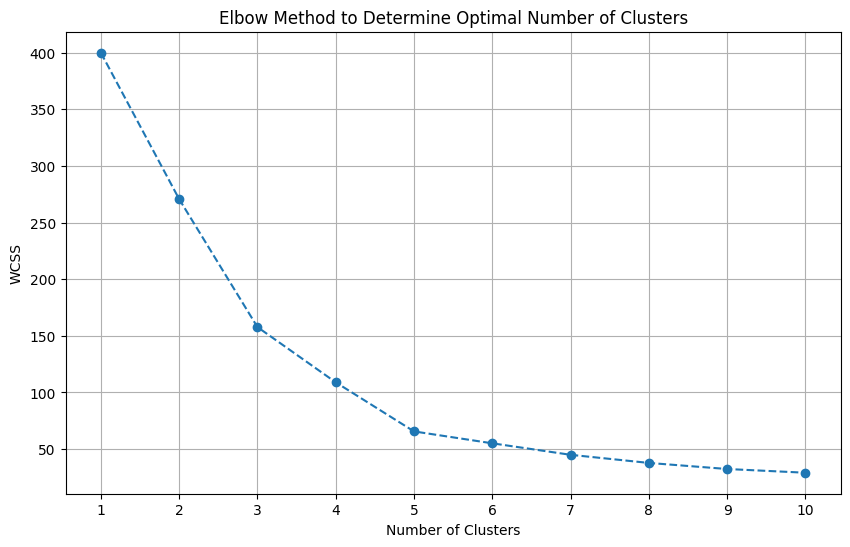

In [19]:
# Elbow method for optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

The Elbow Method plot shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. The goal is to identify the "elbow point," where the WCSS starts to decrease at a slower rate. This point indicates a suitable number of clusters for K-Means clustering.

From the plot, it appears that the elbow point is around 3-5 clusters. The exact elbow point isn't very sharp, which is common in real-world datasets. However, choosing between 3 to 5 clusters would be reasonable for further analysis.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

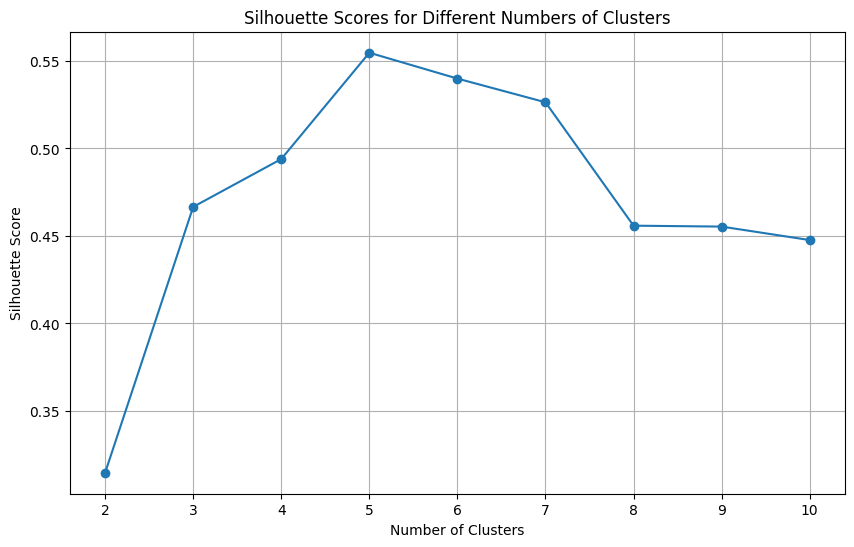

In [20]:
# Silhouette scores for further refinement
silhouette_scores = []
range_n_clusters = list(range(2, 11))
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

The Silhouette Score analysis provides additional insight into the optimal number of clusters. The Silhouette Score measures how similar an object is to its own cluster compared to other clusters. A higher score indicates that objects are well matched to their own cluster and poorly matched to neighboring clusters.

From the plot, we can observe:

* The silhouette score is highest for 5 clusters (approximately 0.5547), suggesting that dividing the data into 5 clusters may provide the most distinct and well-separated groupings.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


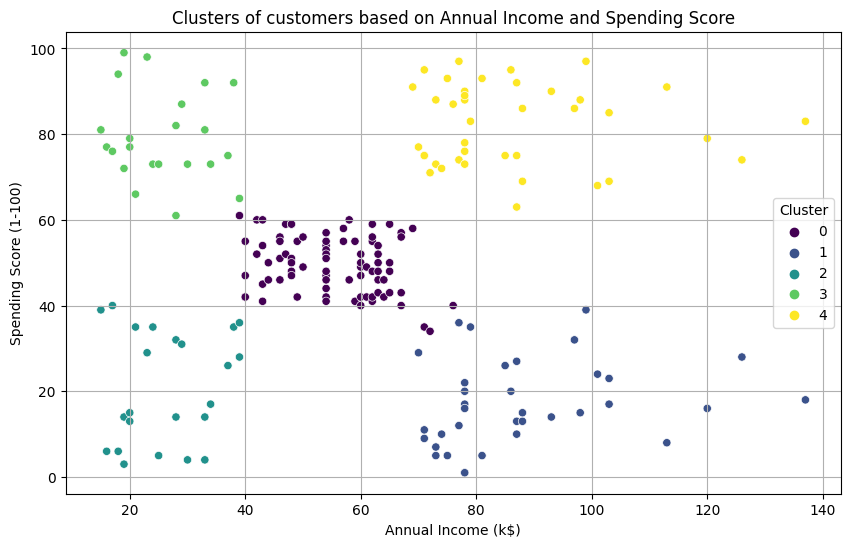

In [21]:
# K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', data=data_with_clusters, legend='full')
plt.title('Clusters of customers based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The K-Means clustering with 5 clusters has been applied successfully. The resulting clusters are visualized in the scatter plot, showing the distribution of customers based on their Annual Income and Spending Score. Different clusters are represented by different colors.

From the plot, we can observe how customers are grouped:

* Some clusters represent customers with high annual income and high spending scores, while others represent those with low income and low spending scores.
* There are also clusters for customers with high income but low spending scores and vice versa.
* These clusters can help in understanding customer behavior patterns and can be used for targeted marketing strategies, customer segmentation, and other business decisions.

